## Bias from input wavelength vs. extraction wavelengths vs. CCD pixels ##

The purpose of this notebook is to quantify any biases from:
 * the phase of the extraction wavelengh grid to the underlying CCD pixel grid
 * the phase of the ccd pixel grid to the location of a delta function input

In [1]:
%pylab inline
import numpy as np
import specter
from specter.extract import ex2d
import desimodel.io

Populating the interactive namespace from numpy and matplotlib


/Users/sbailey/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#- Load DESI z-band PSF and generate a delta function spot for fiber 0 at 8000 Angstroms
psf = desimodel.io.load_psf('z')
xyrange = xmin, xmax, ymin, ymax = psf.xyrange(spec_range=[0,1], wavelengths=[7970,8030])
img = psf.project([8000,], [100,], xyrange=xyrange)

(44.5, 66.5)

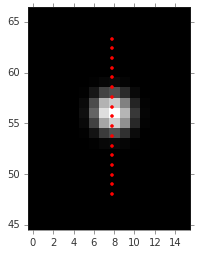

In [3]:
#- Show that spot with an overlaid 0.6 A extraction grid
ww = np.arange(7995, 8005.1, 0.6)
x, y = psf.xy(0, ww)
imshow(img); gray()
plot(x-xmin, y-ymin, 'r.')
xlim(-0.5, img.shape[1]-0.5)
ylim(-0.5+45, img.shape[0]-0.5-45)

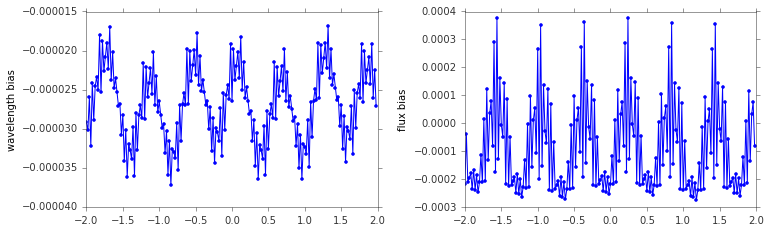

In [4]:
#- Bias vs. phase of wavelenth grid
def extraction_bias(img, psf):
    imgivar = np.ones_like(img)
    woffset = np.arange(-2.0, 2.0, 0.02)
    ww = np.arange(7980, 8020.1, 0.6)
    wbias = list()
    fluxbias = list()
    for dw in woffset:
        flux, ivar, R = ex2d(img, imgivar, psf, [0,1], ww+dw, xyrange=xyrange)
        wbias.append(np.sum((ww+dw)*flux) / np.sum(flux) - 8000)
        fluxbias.append(np.sum(flux)-100)

    figure(figsize=(12,3.5))
    subplots_adjust(wspace=0.3)
    subplot(121)
    plot(woffset, wbias, 'b.-')
    ylabel('wavelength bias')
    subplot(122)
    plot(woffset, fluxbias, 'b.-')
    ylabel('flux bias')
    
extraction_bias(img, psf)

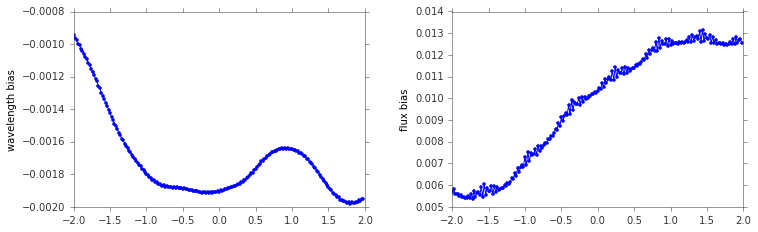

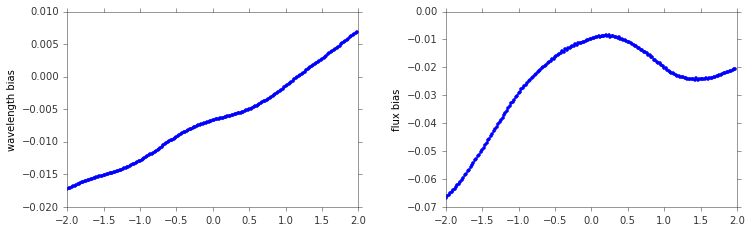

In [5]:
#- Bias vs. phase of wavelenth grid with a slightly noisy image
noisyimage = img + np.random.normal(loc=0, scale=0.001, size=img.shape)
extraction_bias(noisyimage, psf)
noisyimage = img + np.random.normal(loc=0, scale=0.01, size=img.shape)
extraction_bias(noisyimage, psf)

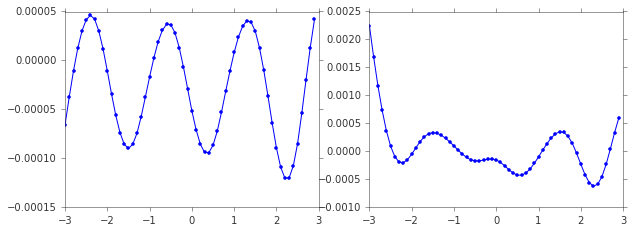

In [7]:
#- Bias vs. phase of spot wrt pixels and wavelength grid
img = psf.project([8000,], [100,], xyrange=xyrange)
imgivar = np.ones_like(img)
woffset = np.arange(-3.0, 3.0, 0.1)
ww = np.arange(7990, 8010.1, 0.6)
wbias = list()
fluxbias = list()
for dw in woffset:
    img = psf.project([8000+dw,], [100,], xyrange=xyrange)
    flux, ivar, R = ex2d(img, imgivar, psf, [0,1], ww, xyrange=xyrange)
    wbias.append(np.sum(ww*flux) / np.sum(flux) - (8000+dw))
    fluxbias.append(np.sum(flux)-100)

figure(figsize=(10,3.5))
subplot(121)
plot(woffset, wbias, 'b.-')
subplot(122)
plot(woffset, fluxbias, 'b.-')